## Analisi sciame sismico Febbraio 2024

In [24]:

import pandas as pd
from datetime import datetime

# https://terremoti.ingv.it/events?starttime=2024-01-31+00%3A00%3A00&endtime=2024-02-07+23%3A59%3A59&last_nd=7&minmag=-1&maxmag=10&mindepth=-10&maxdepth=1000&minlat=44.5&maxlat=44.8&minlon=10&maxlon=10.5&minversion=100&limit=30&orderby=ot-desc&lat=0&lon=0&maxradiuskm=-1&wheretype=area&box_search=Personalizzate



st="2024-02-04T00:00:00"
et="2024-02-09T14:00:00" # $(date +"%Y-%m-%dT%H:%M:00")

et=datetime.now().strftime('%Y-%m-%dT%H:%M:%S.%f')

# narrower
BOX="minlat=44.5&maxlat=44.8&minlon=10&maxlon=10.5"
# wider
BOX="minlat=44.3&maxlat=44.9&minlon=10&maxlon=10.9"


# starttime=2024-01-31+00%3A00%3A00&endtime=2024-02-07+23%3A59%3A59&last_nd=7&minmag=-1&maxmag=10&mindepth=-10&maxdepth=1000&minlat=44.5&maxlat=44.8&minlon=10&maxlon=10.5&minversion=100&limit=30&orderby=ot-desc&lat=0&lon=0&maxradiuskm=-1&wheretype=area&box_search=Personalizzate

"""
<q:quakeml xmlns:q="http://quakeml.org/xmlns/quakeml/1.2" xmlns="http://quakeml.org/xmlns/bed/1.2" xmlns:ingv="http://webservices.ingv.it/fdsnws/event/1">
  <eventParameters publicID="smi:webservices.ingv.it/fdsnws/event/1/query">
    <event publicID="smi:webservices.ingv.it/fdsnws/event/1/query?eventId=37544701">
"""

# 
url=f"http://webservices.ingv.it/fdsnws/event/1/query?starttime={st}&endtime={et}&{BOX}"

# xpath=".//doc:Component", namespaces={"doc":"http://ts.szse.cn/Fund"})

# &format=text 
# df = pd.read_xml("test.xml", xpath=".//quakeml:magnitude", namespaces={"quakeml":"http://quakeml.org/xmlns/bed/1.2"})

df = pd.read_csv(url+"&format=text", delimiter='|')
print("Numero di scosse:", len(df))
df.head()

Numero di scosse: 134


,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName,EventType
0,37549691,2024-02-09T14:02:11.660000,44.6645,10.1395,10.8,SURVEY-INGV,NaN,NaN,NaN,ML,2.4,--,4 km SE Fornovo di Taro (PR),earthquake
1,37549151,2024-02-09T13:19:25.350000,44.6545,10.1595,20.5,SURVEY-INGV,NaN,NaN,NaN,ML,2.2,--,6 km SE Fornovo di Taro (PR),earthquake
2,37548641,2024-02-09T12:44:16.610000,44.6662,10.0368,18.2,SURVEY-INGV,NaN,NaN,NaN,ML,2.7,--,3 km SE Varano de' Melegari (PR),earthquake
3,37548361,2024-02-09T12:29:49.040000,44.6403,10.0008,6.6,SURVEY-INGV,NaN,NaN,NaN,ML,2.4,--,3 km NE Solignano (PR),earthquake
4,37547911,2024-02-09T12:06:21.480000,44.6352,10.1682,20.7,SURVEY-INGV,NaN,NaN,NaN,Mw,4.2,--,5 km NE Calestano (PR),earthquake


In [9]:

# BUG: il numero restituito è troppo elevato: verifica
def convert2epoch(row):
    start_datetime_str = "2024-02-06T00:00:00.000000"
    start_epoch = datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%S.%f')
     
    datetime_str = row["Time"]
    epoch = datetime.strptime(datetime_str, '%Y-%m-%dT%H:%M:%S.%f')
    
    # epoch = datetime.datetime(2021, 7, 7, 1, 2, 1).strftime('%s')
    return epoch.timestamp()-start_epoch.timestamp()


def memo_calc():
    start_datetime_str = "2024-02-04T00:00:00.000000"
    start_epoch = datetime.strptime(start_datetime_str, '%Y-%m-%dT%H:%M:%S.%f')
     
    datetime_str = "2024-02-07T05:46:33.510000"
    epoch = datetime.strptime(datetime_str, '%Y-%m-%dT%H:%M:%S.%f')
    
    # epoch = datetime.datetime(2021, 7, 7, 1, 2, 1).strftime('%s')
    epoch.timestamp()-start_epoch.timestamp()

In [10]:
df['secs'] = df.apply(convert2epoch, axis=1)

df_min = df[["Time", "Latitude", "Longitude", "Depth/Km", "Magnitude", "secs"]]

df_min.head()

,Time,Latitude,Longitude,Depth/Km,Magnitude,secs
0,2024-02-09T13:19:25.350000,44.6545,10.1595,20.5,2.2,307165.35
1,2024-02-09T12:44:16.610000,44.6662,10.0368,18.2,2.7,305056.61
2,2024-02-09T12:29:49.040000,44.6403,10.0008,6.6,2.4,304189.04
3,2024-02-09T12:06:21.480000,44.6352,10.1682,20.7,4.2,302781.48
4,2024-02-09T11:59:59.870000,44.6298,10.1918,22.1,3.0,302399.87


In [5]:
# %matplotlib inline
# %pip install matplotlib 

<Axes: xlabel='secs'>

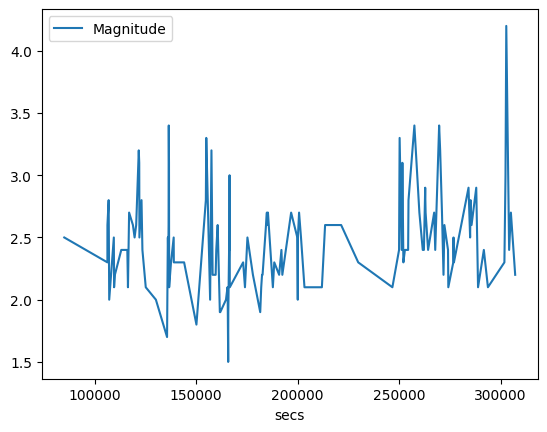

In [14]:
df_min.plot(x="secs", y=["Magnitude"])


<Axes: xlabel='Latitude', ylabel='Longitude'>

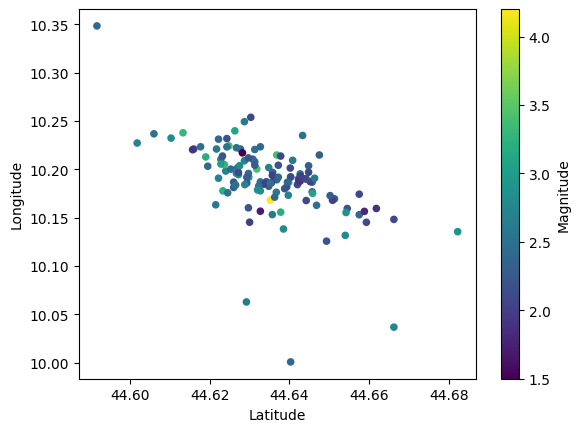

In [19]:
df_min.plot.scatter(x="Latitude", y="Longitude", c="Magnitude")